# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import threading
from datetime import date

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
max_cities = 1500
lats = np.random.uniform(low=-90.000, high=90.000, size=max_cities)
lngs = np.random.uniform(low=-180.000, high=180.000, size=max_cities)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
def printDashes():
    print("-----------------------------")

base_url = "https://api.openweathermap.org/data/2.5/weather?q="
def makeRequest(req_num, req_max, city, data, start_time):
    url = f"{base_url}{city}&units=imperial&appid={api_key}"
    print(f"[{time.time() - start_time:0.1f}s] Request {req_num} | {city}")
    try:
        response = requests.get(url).json()
        if response['cod'] == '404':
            print("...not found. Skipping.")
        else:
            data.append({'City': response['name'], 
                         'Cloudiness': response['clouds']['all'],
                         'Country': response['sys']['country'],
                         'Date': response['dt'],
                         'Humidity': response['main']['humidity'],
                         'Lat': response['coord']['lat'],
                         'Lng': response['coord']['lon'],
                         'Max Temp': response['main']['temp_max'],
                         'Wind Speed': response['wind']['speed']
                        })
    except requests.exceptions.RequestException as e:  # This is the correct syntax
        print(f"REQUEST ERROR: {e}")
    except:
        print("UNKNOWN ERROR")
        
    if req_num >= req_max:
        # all requests are done
        printDashes()
        print("Data Retrieval Complete")
        printDashes()

print("Beginning Data Retrieval")
printDashes()
data = []
req_max = len(cities)
start_time = time.time()
for i in range(req_max):
    req_num = i + 1
    t = threading.Timer((req_num*1.01), makeRequest, args=[req_num, req_max, cities[i], data, start_time])
    t.start()
    

Beginning Data Retrieval
-----------------------------
[1.0s] Request 1 | rio grande
[2.0s] Request 2 | victoria
[3.0s] Request 3 | barentsburg
...not found. Skipping.
[4.1s] Request 4 | busselton
[5.1s] Request 5 | rikitea
[6.1s] Request 6 | kruisfontein
[7.1s] Request 7 | luderitz
[8.1s] Request 8 | yellowknife
[9.1s] Request 9 | bluff
[10.1s] Request 10 | georgetown
[11.1s] Request 11 | mahebourg
[12.1s] Request 12 | hilo
[13.1s] Request 13 | kathmandu
[14.1s] Request 14 | taolanaro
...not found. Skipping.
[15.2s] Request 15 | katobu
[16.2s] Request 16 | marcona
...not found. Skipping.
[17.2s] Request 17 | paamiut
[18.2s] Request 18 | cam ranh
[19.2s] Request 19 | port alfred
[20.2s] Request 20 | lebu
[21.2s] Request 21 | bredasdorp
[22.2s] Request 22 | puerto ayora
[23.2s] Request 23 | codrington
[24.3s] Request 24 | mataura
[25.3s] Request 25 | new norfolk
[26.3s] Request 26 | krupka
[27.3s] Request 27 | pedasi
[28.3s] Request 28 | saint-philippe
[29.3s] Request 29 | arinos
[30.3s

[248.5s] Request 246 | lagos
[249.5s] Request 247 | qasigiannguit
[250.5s] Request 248 | burica
...not found. Skipping.
[251.5s] Request 249 | kamenskoye
...not found. Skipping.
[252.5s] Request 250 | saleaula
...not found. Skipping.
[253.6s] Request 251 | ballina
[254.6s] Request 252 | sobolevo
[255.6s] Request 253 | kaitangata
[256.6s] Request 254 | sorong
[257.6s] Request 255 | oistins
[258.6s] Request 256 | igarka
[259.6s] Request 257 | warri
[260.6s] Request 258 | feldkirchen an der donau
[261.6s] Request 259 | aklavik
[262.6s] Request 260 | havoysund
[263.7s] Request 261 | mawlaik
[264.7s] Request 262 | khingansk
[265.7s] Request 263 | nador
[266.7s] Request 264 | uitenhage
[267.7s] Request 265 | ancud
[268.7s] Request 266 | the valley
[269.7s] Request 267 | kirkwall
[270.7s] Request 268 | tidore
...not found. Skipping.
[271.7s] Request 269 | tura
[272.7s] Request 270 | anchorage
[273.8s] Request 271 | vila franca do campo
[274.8s] Request 272 | lasa
[275.8s] Request 273 | mahon


[483.9s] Request 479 | wuwei
[484.9s] Request 480 | la palma
[485.9s] Request 481 | vilhena
[486.9s] Request 482 | lugovoy
[487.9s] Request 483 | shitanjing
[488.9s] Request 484 | ponta delgada
[489.9s] Request 485 | ikom
[490.9s] Request 486 | sola
[491.9s] Request 487 | vanavara
[493.0s] Request 488 | louisbourg
...not found. Skipping.
[494.0s] Request 489 | axim
[495.0s] Request 490 | kapoeta
...not found. Skipping.
[496.0s] Request 491 | havelock
[497.0s] Request 492 | natal
[498.0s] Request 493 | henties bay
[499.0s] Request 494 | tefe
[500.0s] Request 495 | port hardy
[501.0s] Request 496 | chaoyang
[502.0s] Request 497 | doha
[503.1s] Request 498 | solnechnyy
[504.1s] Request 499 | shenjiamen
[505.1s] Request 500 | vysokogornyy
[506.1s] Request 501 | novyy buh
[507.1s] Request 502 | prince rupert
[508.1s] Request 503 | naryan-mar
[509.1s] Request 504 | piacabucu
[510.1s] Request 505 | semnan
[511.1s] Request 506 | medina
[512.1s] Request 507 | bangaon
[513.2s] Request 508 | naze

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [43]:
base_df = pd.DataFrame(data)
base_df.to_csv(path_or_buf='./' + output_data_file)
base_df.count()

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [44]:
base_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rio Grande,66,BR,1569648191,89,-32.03,-52.10,51.66,6.42
1,Victoria,75,BN,1569648219,66,5.28,115.24,89.60,3.36
2,Busselton,0,AU,1569648078,38,-33.64,115.35,73.00,13.13
3,Rikitea,39,PF,1569647916,79,-23.12,-134.97,73.48,8.37
4,Kruisfontein,91,ZA,1569648223,84,-34.00,24.73,64.46,6.40


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

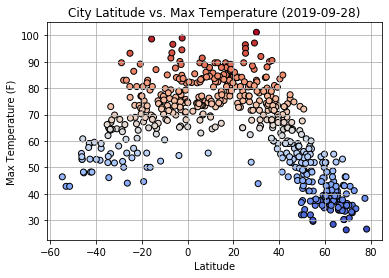

In [50]:
plt.title(f"City Latitude vs. Max Temperature ({str(date.today())})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.scatter(base_df['Lat'], base_df['Max Temp'], c=base_df['Max Temp'], cmap='coolwarm', edgecolors='black')
plt.grid(b=True)
plt.savefig("./Figures/lat_vs_temp.png")
plt.show()

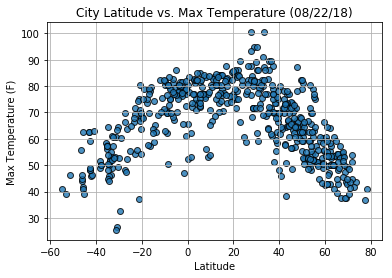

#### Latitude vs. Humidity Plot

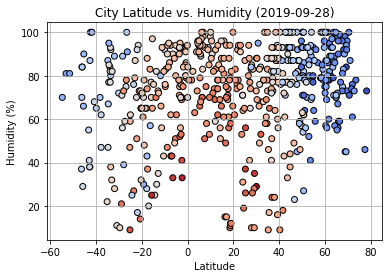

In [51]:
plt.title(f"City Latitude vs. Humidity ({str(date.today())})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.scatter(base_df['Lat'], base_df['Humidity'], c=base_df['Max Temp'], cmap='coolwarm', edgecolors='black')
plt.grid(b=True)
plt.savefig("./Figures/lat_vs_humidity.png")
plt.show()

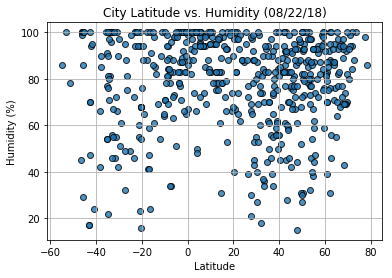

#### Latitude vs. Cloudiness Plot

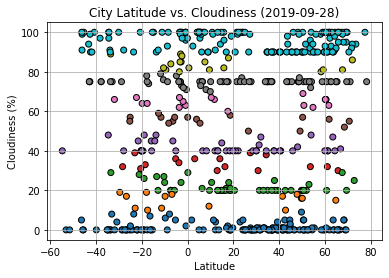

In [52]:
plt.title(f"City Latitude vs. Cloudiness ({str(date.today())})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.scatter(base_df['Lat'], base_df['Cloudiness'], c=base_df['Cloudiness'], cmap='tab10', edgecolors='black')
plt.grid(b=True)
plt.savefig("./Figures/lat_vs_cloudiness.png")
plt.show()

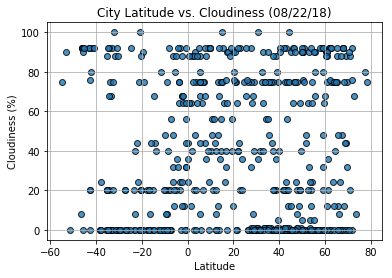

#### Latitude vs. Wind Speed Plot

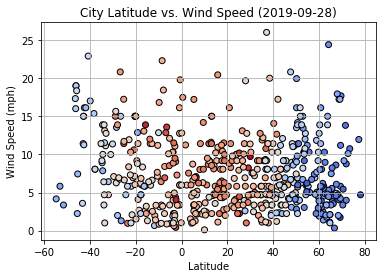

In [53]:
plt.title(f"City Latitude vs. Wind Speed ({str(date.today())})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.scatter(base_df['Lat'], base_df['Wind Speed'], c=base_df['Max Temp'], cmap='coolwarm', edgecolors='black')
plt.grid(b=True)
plt.savefig("./Figures/lat_vs_wind.png")
plt.show()

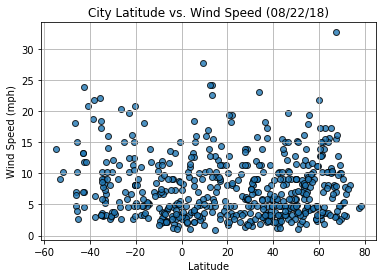

#### BONUS! Max Temp by Longitude & Latitude

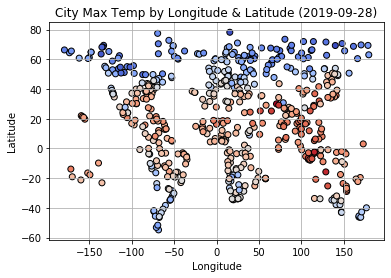

In [54]:
plt.title(f"City Max Temp by Longitude & Latitude ({str(date.today())})")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.scatter(base_df['Lng'], base_df['Lat'], c=base_df['Max Temp'], cmap='coolwarm', edgecolors='black')
plt.grid(b=True)
plt.savefig("./Figures/temp_by_lonlat.png")
plt.show()

## CONCLUSIONS

### 1 - Temperatures Increase as You Approach The Equator

As predicted, temperatures increase as one approaches the equator. Additional research on historical data may be needed to determine the full effect that seasonal fluxuations have on this premise.

### 2 - Cloud Cover is a Highly Subjective Data Point

Reports of cloud cover do not appear to be scientifically measured, with human estimations that favor "round" numbers dominating the data.

### 3 - There is No Strong Correlation Between Equatorial Distance and Either Wind Speed or Humidity

There is no correlation between **equatorial distance** and **wind speed**, however there is enough between **equatorial distance** and **humidity** to warrant additional sampling to demonstrate a trend for Temperate latitudes to have lower **humidity**.